In [47]:
import numpy as np

import torch
import torch.nn as nn
import torchvision.utils as vutils
from torchvision import transforms

from dataset import CelebA
from model import Generator

In [48]:
device = torch.device('cuda')
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

In [49]:
gen = Generator(140)
gen = gen.to(device)
gen.load_state_dict(torch.load('../model/gen_epoch_5.model'))

In [50]:
z = torch.randn((1, 100)).to(device)
y = torch.zeros((1, 40)).to(device)

celeb = CelebA('../../../local/CelebA', 'img_align_celeba', 'list_attr_celeba.csv', transform=transform)
attrnames = list(celeb.df.columns)[1:]

completed loading dataset


In [51]:
attrnames

['5_o_Clock_Shadow',
 'Arched_Eyebrows',
 'Attractive',
 'Bags_Under_Eyes',
 'Bald',
 'Bangs',
 'Big_Lips',
 'Big_Nose',
 'Black_Hair',
 'Blond_Hair',
 'Blurry',
 'Brown_Hair',
 'Bushy_Eyebrows',
 'Chubby',
 'Double_Chin',
 'Eyeglasses',
 'Goatee',
 'Gray_Hair',
 'Heavy_Makeup',
 'High_Cheekbones',
 'Male',
 'Mouth_Slightly_Open',
 'Mustache',
 'Narrow_Eyes',
 'No_Beard',
 'Oval_Face',
 'Pale_Skin',
 'Pointy_Nose',
 'Receding_Hairline',
 'Rosy_Cheeks',
 'Sideburns',
 'Smiling',
 'Straight_Hair',
 'Wavy_Hair',
 'Wearing_Earrings',
 'Wearing_Hat',
 'Wearing_Lipstick',
 'Wearing_Necklace',
 'Wearing_Necktie',
 'Young']

In [52]:
sample = celeb[np.random.randint(len(celeb))]
img = sample['image']
att = sample['attributes']

In [53]:
import matplotlib.pyplot as plt

idx = np.random.randint(40)
y[0, idx] = 1
out = gen(z, y)

In [54]:
im = out.detach().cpu().numpy().reshape(3, 64, 64).transpose(1, 2, 0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


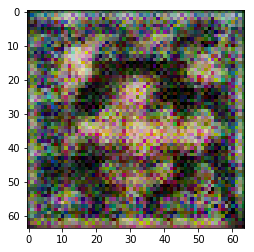

In [55]:
plt.imshow(im)

In [56]:
attrnames[idx]

'Gray_Hair'